# Section 2.4 Reduction of generation interval by backcross

In [ ]:
# Modified package 
library("devtools")
install_github("gglinzijie/xbreed",force=TRUE)

In [76]:
library("xbreed")

# Genome specification

In [3]:
#Number of markers per chr from chapter 1
lin_map<-read.table("raw.map")
m=1:22
for(i in 1:22) {m[i]=dim(lin_map[lin_map$V1==i,])[1]}
sum(m)

[1] 3928

In [4]:
#data from chaptre 1
geno<-read.table("Hetero_realigned_cov10_filtered3.raw")
pheno<-read.csv("2017heteroPheno.csv", header=T)
attach(pheno)

In [5]:
#parameter of genome
no.chr<-22
genome<-data.frame(matrix(NA, nrow=no.chr, ncol=6))
names(genome)<-c("chr","len","nmrk","mpos","nqtl","qpos")
genome$chr<-c(1:no.chr) #Chromosome id from 1 to 22
genome$len<-c(200,rep(100,21))#Chromosome length in cM
genome$nmrk<-c(m) #Number of markers, 3928 in total 
genome$mpos<-c('even') 
genome$nqtl<-c(40) #Number of qtl  40*22 = 880 in total
genome$qpos<-c('rnd')

# Historiacal population 

In [6]:
# Historical population 
hp<-make_hp(hpsize=1000 ,ng=5000,h2=0.654,phen_var=84,
            genome=genome,mutr=2.5*10**-4,laf=1)

---sel_seq_qtl is missing, it has been set to default value of 0
---sel_seq_mrk is missing, it has been set to default value of 0
Historical pop is initialized...
Simulating trait ...
Output data preparation ...
Establishment of historical population completed


In [7]:
# Expected Heterozygosity according to (Kimura and Crow 1964) 
mutr<-2.5*10**-4
ne<-1000 
k<-2 
Fneu<-4*ne*mutr 
(Expected_het1<-Fneu/(1+Fneu))
(Expected_het2<-1-((1+((Fneu)/(k-1)))/(1+((Fneu*k)/(k-1)))))
(het_observed<-mean(2*(hp$freqMrk[,3]*hp$freqMrk[,4])))

[1] 0.5

[1] 0.3333333

[1] 0.3998998

In [77]:
Male_founders<-data.frame(number=10,select='rnd')
Female_founders<-data.frame(number=10,select='rnd')

In [78]:
Selection<-data.frame(matrix(NA, nrow=2, ncol=3))
names(Selection)<-c('Number','type','Value') 
Selection$Number[1:2]<-c(10,10)
Selection$type[1:2]<-c('gebv','gebv')
Selection$Value[1:2]<-c('l','l')

In [79]:
# Training parameters
Training<-data.frame(matrix(NA, nrow=1, ncol=3))
names(Training)<-c('size','sel','method')
Training$size<-250
Training$sel<-'rnd'
Training$method<-'BayesC'

In [80]:
sh_output<-data.frame(matrix(NA, nrow=2, ncol=1))
names(sh_output)<-c("data")
sh_output[,1]<-c(seq(0,1))

In [101]:
#10 sires and 10 dams perform complete cross; 100 combination of mating and each has 10 litters. 1000 intotal
RP10A<-sample_hp(hp_out=hp,Male_founders= Male_founders,
              Female_founders=Female_founders,ng=4,Selection=Selection,Training=Training,
              litter_size=10,saveAt="SNP3928",sh_output=sh_output,Display=FALSE)

Controlling input data ...
Intializing base population ...
Generation 0 started ......... 
Generation 0 is finished. Time taken: 12.66722
Generation 1 started ......... 
Generation 1 is finished. Time taken: 13.27656
Generation 2 started ......... 
Generation 2 is finished. Time taken: 14.24483
Generation 3 started ......... 
Generation 3 is finished. Time taken: 13.61957
Generation 4 started ......... 
Generation 4 is finished. Time taken: 13.65703
Output data preparation ...
Writing output files ...
Sampling hp is done!


In [109]:
Males<-data.frame(number=10,generation=1,select='gebv',value='l')
Females<-data.frame(number=10,generation=0,select='gebv',value='l')
Selection<-data.frame(matrix(NA, nrow=2, ncol=3))
names(Selection)<-c('Number','type','Value')
Selection$Number[1:2]<-c(10,10)
Selection$type[1:2]<-c('gebv','gebv')
Selection$Value[1:2]<-c('l','l')
# Training parameters
Training<-data.frame(matrix(NA, nrow=1, ncol=8))
names(Training)<-c('size','sel','method','nIter','burnIn','thin','save','show')
Training$size<-250
Training$sel<-'rnd'
Training$method<-'BayesC'
Training$nIter<-2000
Training$burnIn<-1000 
Training$thin<-5 
Training$save<-'bayes'
Training$show<-FALSE
# Save all data for the last two generations of RP2
rp2_output<-data.frame(matrix(NA, nrow=1, ncol=6))
names(rp2_output)<-c('data','qtl','marker','seq','freq_qtl','freq_mrk')
rp2_output[,1]<-c(1)
rp2_output[,2]<-c(1)
rp2_output[,3]<-c(1)
rp2_output[,4]<-c(1)
rp2_output[,5]<-c(1)
rp2_output[,6]<-c(1)

In [83]:
RP10A_F_Back<-make_rp(sh_out=RP10A,sh_out2=RP10A,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 15.72487
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.91298
Output data preparation ...
  Generation Phenotype   TrueBV     GEBV M_accuracy F_accuracy heritability
1          1   15.8245 15.87456 -11.8234  0.7611253  0.6970058    0.5446421
Writing output files ...
Making RP is done!


In [87]:
Males<-data.frame(number=10,generation=1,select='gebv',value='l')
Females<-data.frame(number=10,generation=1,select='gebv',value='l')

In [88]:
RP3<-make_rp(sh_out=RP10A_F_Back,sh_out2=RP10A,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 13.32342
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.99888
Output data preparation ...
  Generation Phenotype  TrueBV      GEBV M_accuracy F_accuracy heritability
1          1   6.30023 6.14264 -5.628635   0.606259  0.6317538    0.5350965
Writing output files ...
Making RP is done!


In [95]:
Males<-data.frame(number=10,generation=2,select='gebv',value='l')
Females<-data.frame(number=10,generation=1,select='gebv',value='l')

In [96]:
RP4<-make_rp(sh_out=RP10A,sh_out2=RP10A_F_Back,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 12.74297
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.38585
Output data preparation ...
  Generation Phenotype   TrueBV      GEBV M_accuracy F_accuracy heritability
1          1  2.703135 2.916221 -3.489849  0.6087719  0.5538607    0.5540705
Writing output files ...
Making RP is done!


In [92]:
Males<-data.frame(number=10,generation=1,select='gebv',value='l')
Females<-data.frame(number=10,generation=2,select='gebv',value='l')

In [93]:
RP5<-make_rp(sh_out=RP3,sh_out2=RP10A,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 12.79031
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.41175
Output data preparation ...
  Generation Phenotype    TrueBV      GEBV M_accuracy F_accuracy heritability
1          1 -2.598469 -2.444179 -1.742428  0.6857655  0.6838299     0.562832
Writing output files ...
Making RP is done!


In [98]:
Males<-data.frame(number=10,generation=1,select='gebv',value='l')
Females<-data.frame(number=10,generation=1,select='gebv',value='l')

In [103]:
RP6<-make_rp(sh_out=RP4,sh_out2=RP3,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 14.03495
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.77174
Output data preparation ...
  Generation Phenotype    TrueBV     GEBV M_accuracy F_accuracy heritability
1          1  -3.47349 -3.458598 7.467136   0.564066  0.6041563     0.547011
Writing output files ...
Making RP is done!


In [105]:
RP7<-make_rp(sh_out=RP5,sh_out2=RP4,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 14.67965
Generation 1 started ........ 
Generation 1 is finished. Time taken: 14.37391
Output data preparation ...
  Generation Phenotype    TrueBV      GEBV M_accuracy F_accuracy heritability
1          1 -8.243022 -8.207985 -3.953334  0.6961209  0.6556074    0.5717341
Writing output files ...
Making RP is done!


In [107]:
RP8<-make_rp(sh_out=RP6,sh_out2=RP5,Male_founders=Males,
Female_founders=Females,Selection=Selection,
ng=1,litter_size=10,saveAt='RP2',Training=Training,
rp_output=rp2_output)

Controlling input data ...
Intializing base population ...
Generation 0 started ........ 
Generation 0 is finished. Time taken: 14.68871
Generation 1 started ........ 
Generation 1 is finished. Time taken: 13.1736
Output data preparation ...
  Generation Phenotype    TrueBV      GEBV M_accuracy F_accuracy heritability
1          1 -12.15729 -11.96275 -16.21501  0.6211454  0.6705304    0.5198144
Writing output files ...
Making RP is done!


In [110]:
# Function for calculating the allele coding, which is 0, 1, 2
bin_snp<-function(mat){
s1<-seq(1,ncol(mat),2)
s2<-seq(2,ncol(mat),2)
a1<-mat[,s1]+mat[,s2]
a1[a1==3]=1
a1[a1==4]=0
snp_code<-a1
return(snp_code)
 }

In [124]:
hete<-list()
MAF<-list()
for (i in seq(1,4,1)){
n<-bin_snp(RP10A$output[[i+1]]$mrk[,3:7858])
hete[i]<-sum(n==1)/(dim(n)[1]*dim(n)[2])
MAF[i]<-sum(n==0)/(dim(n)[1]*dim(n)[2])   
}

In [129]:
gain<-list()
gain[1]<-0
for (i in seq(1,3,1)){
gain[i+1]<-abs(RP10A$summary_data$TrueBV[i+1]-RP10A$summary_data$TrueBV[1])
}  

In [150]:
hete2<-list()
chete2<-function(RP,i){
n<-bin_snp(RP$output[[i+1]]$mrk[,3:7858])
return(sum(n==1)/(dim(n)[1]*dim(n)[2]))}
hete2[1]<-chete2(RP10A,1)
hete2[2]<-chete2(RP10A_F_Back,1)
hete2[3]<-chete2(RP10A,2)
hete2[4]<-chete2(RP3,1)
hete2[5]<-chete2(RP4,1)
hete2[6]<-chete2(RP5,1)
hete2[7]<-chete2(RP6,1)
hete2[8]<-chete2(RP7,1)
hete2[9]<-chete2(RP8,1)

In [154]:
MAF2<-list()
cMAF2<-function(RP,i){
n<-bin_snp(RP$output[[i+1]]$mrk[,3:7858])
return(sum(n==0)/(dim(n)[1]*dim(n)[2]))}
MAF2[1]<-cMAF2(RP10A,1)
MAF2[2]<-cMAF2(RP10A_F_Back,1)
MAF2[3]<-cMAF2(RP10A,2)
MAF2[4]<-cMAF2(RP3,1)
MAF2[5]<-cMAF2(RP4,1)
MAF2[6]<-cMAF2(RP5,1)
MAF2[7]<-cMAF2(RP6,1)
MAF2[8]<-cMAF2(RP7,1)
MAF2[9]<-cMAF2(RP8,1)

In [180]:
year<-as.numeric(c(0,3,6,9))
year2<-as.numeric(c(0,2,3,4,5,6,7,8,9))

In [183]:
m<-rbind(RP10A$summary_data[1,],RP10A_F_Back$summary_data,RP10A$summary_data[2,],
         RP3$summary_data,RP4$summary_data,RP5$summary_data,RP6$summary_data,
         RP7$summary_data,RP8$summary_data)
gain2<-list()
gain2[1]<-0
for (i in seq(1,8,1)){
gain2[i+1]<-abs(m$TrueBV[i+1]-m$TrueBV[1])}

In [182]:
(y12<-cbind(RP10A$summary_data,unlist(hete),unlist(MAF),unlist(gain),year))

Generation,Phenotype,TrueBV,GEBV,M_accuracy,F_accuracy,heritability,unlist(hete),unlist(MAF),unlist(gain),year
1,21.143288,21.030303,-6.2299255,0.6958713,0.7066922,0.6165562,0.3992749,0.2594560,0.000000,0
2,11.618931,11.633942,0.1657685,0.6566293,0.6886812,0.5531086,0.3387839,0.2882245,9.396361,3
3,1.477465,1.476638,-5.2141693,0.6494163,0.6188069,0.4598107,0.2972207,0.3109799,19.553665,6
4,-4.247442,-4.461889,-7.2064059,0.6189117,0.6550834,0.4785497,0.2623386,0.3296690,25.492192,9


In [184]:
(y12withb<-cbind(m,unlist(hete2),unlist(MAF2),unlist(gain2),year2))

,Generation,Phenotype,TrueBV,GEBV,M_accuracy,F_accuracy,heritability,unlist(hete2),unlist(MAF2),unlist(gain2),year2
1,1,21.143288,21.030303,-6.2299255,0.6958713,0.7066922,0.6165562,0.3992749,0.2594560,0.000000,0
2,1,15.824504,15.874556,-11.8234004,0.7611253,0.6970058,0.5446421,0.3866482,0.2672230,5.155747,2
21,2,11.618931,11.633942,0.1657685,0.6566293,0.6886812,0.5531086,0.3387839,0.2882245,9.396361,3
11,1,6.300230,6.142640,-5.6286346,0.6062590,0.6317538,0.5350965,0.3992602,0.2596622,14.887663,4
12,1,2.703135,2.916221,-3.4898490,0.6087719,0.5538607,0.5540705,0.3954908,0.2627133,18.114082,5
13,1,-2.598469,-2.444179,-1.7424282,0.6857655,0.6838299,0.5628320,0.3530575,0.2836102,23.474481,6
14,1,-3.473490,-3.458598,7.4671364,0.5640660,0.6041563,0.5470110,0.3465659,0.2869404,24.488901,7
15,1,-8.243022,-8.207985,-3.9533339,0.6961209,0.6556074,0.5717341,0.3506815,0.2823030,29.238287,8
16,1,-12.157286,-11.962749,-16.2150149,0.6211454,0.6705304,0.5198144,0.3330260,0.2937195,32.993052,9


In [185]:
library("xlsx")
write.xlsx(y12, "y12.xlsx") 
write.xlsx(y12withb, "y12withb.xlsx") 

In [1]:
library("readxl")
y12<-read_excel("y12.xlsx")
y12withb<-read_excel("y12withb.xlsx")

In [2]:
colnames(y12)<-c(1:12)
colnames(y12withb)<-c(1:12)
m<-rbind(y12,y12withb)

In [3]:
plotm<-data.frame(gain=m[,11],
                 hete=m[,9],
                 year=m[,12],
                 h=m[,8],
                 Backcross=c(rep("No",4),rep("Yes",9)))

In [4]:
plotm

X11,X9,X12,X8,Backcross
0.000000,0.3992749,0,0.6165562,No
9.396361,0.3387839,3,0.5531086,No
19.553665,0.2972207,6,0.4598107,No
25.492192,0.2623386,9,0.4785497,No
0.000000,0.3992749,0,0.6165562,Yes
5.155747,0.3866482,2,0.5446421,Yes
9.396361,0.3387839,3,0.5531086,Yes
14.887663,0.3992602,4,0.5350965,Yes
18.114082,0.3954908,5,0.5540705,Yes
23.474481,0.3530575,6,0.5628320,Yes


In [6]:
library(ggplot2)
p1 <- ggplot(plotm, aes(x=as.factor(X12), y=X9,group=Backcross)) + 
       geom_line(aes(color=Backcross))+
       geom_point(aes(color=Backcross))+    
       labs(x = "Start year of genomic selection",y="Mean heterozygosity")+
       scale_colour_manual(values=c("red", "blue"),
                       name="Backcross")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
                  text=element_text(size=10, family="serif"),
                        legend.position="none")           

In [7]:
p2 <- ggplot(plotm, aes(x=as.factor(X12), y=X8,group=Backcross)) + 
       geom_line(aes(color=Backcross))+
       geom_point(aes(color=Backcross))+    
       labs(x = "Start year of genomic selection",y="Heritability")+
       scale_colour_manual(values=c("red", "blue"),
                       name="Backcross")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
                  text=element_text(size=10, family="serif"),
                        legend.position="none")           

In [8]:
p3 <- ggplot(plotm, aes(x=as.factor(X12), y=X11,group=Backcross)) + 
       geom_line(aes(color=Backcross))+
       geom_point(aes(color=Backcross))+    
       labs(x = "Start year of genomic selection",y="AASR")+
       scale_colour_manual(values=c("red", "blue"),
                       name="Backcross")+
       theme(axis.text.y= element_text(size = rel(1.2)),
             axis.text.x = element_text(size = rel(1.2)),
                  text=element_text(size=10, family="serif"))



*******************************************************
Note: cowplot does not change the default ggplot2 theme
anymore. To recover the previous behavior, execute:
  theme_set(theme_cowplot())
*******************************************************



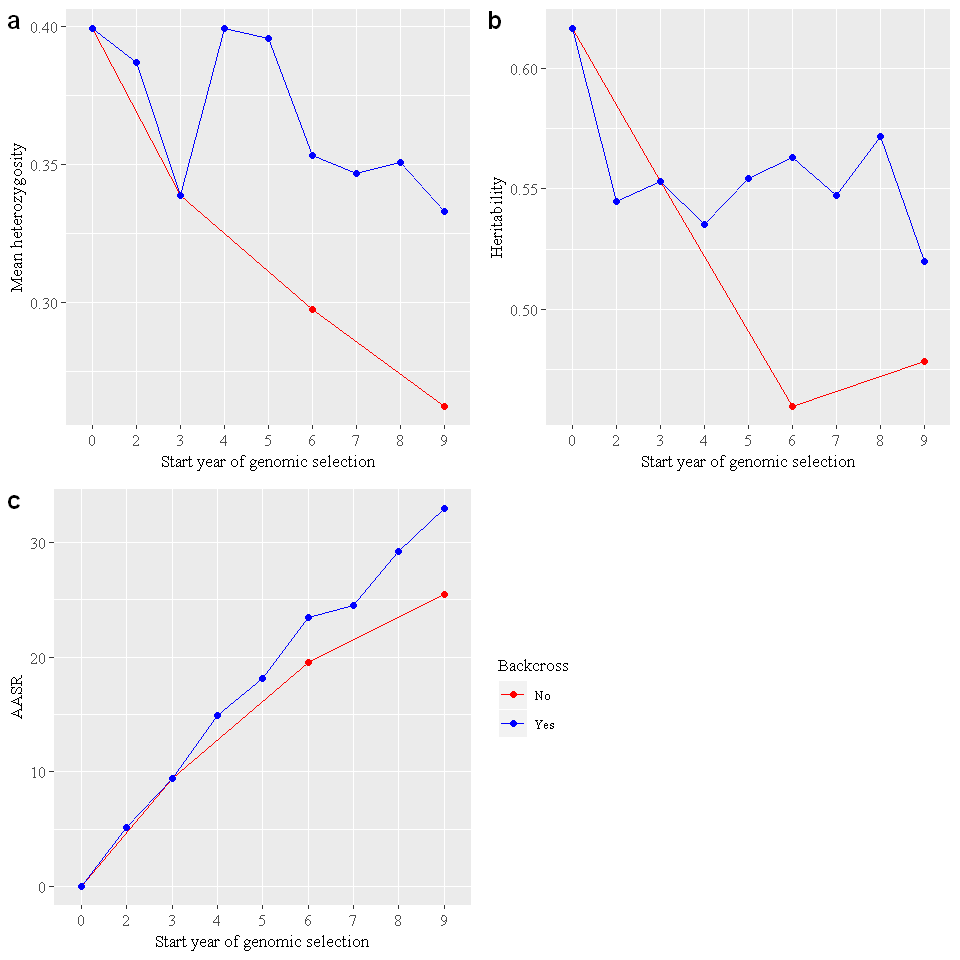

In [9]:
library("cowplot")
options(repr.plot.width=8, repr.plot.height=8)
all<- ggdraw() +
  draw_plot(p1, x = 0, y = .5, width = .5, height = .5) +
  draw_plot(p2, x = .5, y = .5, width = .5, height = .5) +
  draw_plot(p3, x = 0, y = 0, width = .61, height = 0.5) +
  draw_plot_label(label = c("a", "b", "c"), size = 15,
                  x = c(0, 0.5, 0), y = c(1, 1, 0.5))
all

In [10]:
png("2.4 Reduce generation interval by backcross.png", width=8, height=8, units="in", res=300)
all
dev.off()

png 
  2